# Laboratorio 10: Percepción Remota Aplicada

## Álvaro Paredes (alvaro.paredes@dataobservatory.net) | Javier Lopatin (javier.lopatin@uai.cl)

En este práctico vamos a ver cómo utilizar Jupyter Notebooks con Kernel de Python para realizar una regresión RandomForest.

Primero, instalaremos las librerias correspondientes:


In [ ]:
%%capture
# Installations
!apt install gdal-bin python-gdal python3-gdal 
!pip install geopandas
!pip install xarray rasterio rioxarray earthpy
!pip install sklearn numpy
!pip install yellowbrick
#!pip install geoviews 
# !pip install hvplot
# !pip install holoviews

In [ ]:
# cargamos las librerias en el sistema
import xarray as xr
import rioxarray as riox
import pandas as pd
import geopandas as gpd
import numpy as np
import glob, os
import matplotlib.pyplot as plt
import earthpy.plot as ep

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split#, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score
# from sklearn.preprocessing import OneHotEncoder

#from yellowbrick.classifier import ConfusionMatrix, ClassPredictionError
from yellowbrick.model_selection import FeatureImportances

In [ ]:
# función para cargar un raster a la memoria del sistema
def rasterio_open(f):
    return riox.open_rasterio(f)

## Cargar Datos de tablas





In [ ]:
%%capture
!git clone https://github.com/alvaroparedesl/percepcion_remota

In [ ]:
y_var = 'riqueza'
out_columns = ['REGION', 'PROVINCIA', 'COMUNA']

data = pd.read_csv('percepcion_remota/Data/Lab10/data_full.csv').set_index('Parcela')
data.rename(columns={'Riqueza observada': 'riqueza'}, inplace=True)
data.iloc[0].T

riqueza             15
REGION           Maule
PROVINCIA    Cauquenes
COMUNA       Cauquenes
coastal         8963.0
blue            9309.0
green          10378.0
red            11266.0
nir08          16707.0
swir16         17619.0
swir22         14620.0
ndvi          0.194509
Name: BMBNDIE1, dtype: object

count    78.000000
mean      6.717949
std       2.672114
min       1.000000
25%       5.000000
50%       6.000000
75%       8.000000
max      15.000000
Name: riqueza, dtype: float64


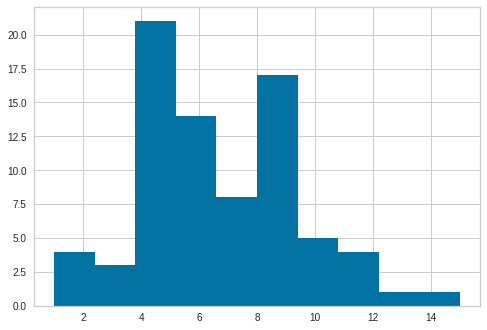

In [ ]:
# Distribución Riqueza observada
print(data[y_var].describe())
data[y_var].hist()

## Ajuste del modelo

En este caso, no tenemos variables predictoras categóricas que podamos usar en un raster, pero podríamos usarlas con `pandas.get_dummies` o `OneHotEncoder` de `sklearn`.

Queda el código de como se podría usar, pero en este ejemplo no es necesario.

![](https://www.statology.org/wp-content/uploads/2021/09/oneHot1-768x357.png)

In [ ]:
# predictores
X = pd.get_dummies( data[data.columns[~data.columns.isin([y_var] + out_columns)]] ) # para transformar las clases a variables dummies (equivalente a HotEncoder)
X.iloc[0].T

coastal     8963.000000
blue        9309.000000
green      10378.000000
red        11266.000000
nir08      16707.000000
swir16     17619.000000
swir22     14620.000000
ndvi           0.194509
Name: BMBNDIE1, dtype: float64

In [ ]:
# respuesta
Y = data[y_var]

In [ ]:
# separar observaciones en un set de datos de entrenamiento y validacion
y_train, y_test, X_train, X_test = train_test_split(Y, X, test_size=1/3, random_state=3451)
print(len(y_train))
print(len(y_test))

52
26


In [ ]:
# datos X de validación
X_test.head()

,coastal,blue,green,red,nir08,swir16,swir22,ndvi
Parcela,,,,,,,,
Nativo 106,7518.0,7619.0,8173.0,7859.0,14408.0,9955.0,8507.0,0.294112
BMBNMIR2,8392.0,8661.0,9448.0,9756.0,15114.0,15346.0,12234.0,0.215440
GEDI 12,8678.0,9121.0,10258.0,10433.0,16351.0,13747.0,11723.0,0.220953
BMBNMIR5,8554.0,8796.0,9515.0,10042.0,15158.0,15555.0,12620.0,0.203016
Nativo 109,7618.0,7738.0,8404.0,8098.0,16150.0,11218.0,9045.0,0.332069


In [ ]:
# datos y de validación
y_test

Parcela
Nativo 106          13
BMBNMIR2             6
GEDI 12              6
BMBNMIR5             5
Nativo 109           9
ELNATIVONOV20202     8
BNMIR1               4
GEDI 14              3
Playa blanca 3-1     8
ENEA01-ENERO         6
quirihueBN03         8
P3BNMOLCO            4
PA 003               9
lacapilla1           5
BMBNDIE1            15
BMBNMIR3             6
GEDI-4               6
Nativo 108           5
GEDI-1               7
SANESTEBAN1          5
ENEA02-N             5
ENEA04N              7
GEDI-6               6
ENEA05N              5
P2BNMOLCO            2
GEDI-10             10
Name: riqueza, dtype: int64

In [ ]:
# parametros para hacer tuning
# no vamos acorres esto en el práctico,ya que toma bastante tiempo en Colab.
'''
# Create the random grid
random_grid = {'n_estimators': [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)],
               'max_features': ['auto', 'sqrt'],
               'max_depth': [int(x) for x in np.linspace(10, 110, num = 5)],
               'min_samples_split': [2, 5, 10],
               'min_samples_leaf': [1, 2, 4],
               'bootstrap': True}
print(random_grid)
'''

In [ ]:
'''
# entrenar un clasificador Random Forest con parameter tuning de KFold
model = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
RF = RandomizedSearchCV(estimator = model, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

RF.fit(X_train, y_train)
RF.best_params_
'''

In [ ]:
# ajustar modelo con mejores parámetros encontrados de antemano
model = RandomForestRegressor(
    n_estimators = 10,
    criterion    = 'squared_error',
    max_depth    = None,
    max_features = 'auto',
    oob_score    = False,
    n_jobs       = -1,
    random_state = 123
    )

# se pone .values en X_train para entrenar con array y no con DataFrame
model.fit(X_train, y_train) 

# ajustes en entrenamiento
pred_train = model.predict(X_train)

Opcionalmente se puede guardar el modelo entrenado para ser usado después.

Corriendo el código siguiente se puede guardar el modelo en formato binary.joblib:

```python
dump(model, 'ml_model.joblib')
```
Para cargar nuevamente el modelo al sistema: 

```python
from joblib import load
ml_model = 'ml_model.joblib'
model = load(ml_model)
```

## Evaluación del modelo

In [ ]:
# matriz de confusion usando el método de yellowbrick
train_rmse = mean_squared_error(
        y_true  = y_train,
        y_pred  = pred_train,
        squared = False
       )
train_r2 = r2_score(
       y_true  = y_train,
       y_pred  = pred_train)

print(f"El error (rmse) de entrenamiento es: {round(train_rmse, 3)}")
print(f"El ajuste (r2) de entrenamiento es: {round(train_r2, 3)}")

El error (rmse) de entrenamiento es: 1.282
El ajuste (r2) de entrenamiento es: 0.751


In [ ]:
importancia_predictores = pd.DataFrame(
                            {'predictor': X_train.columns,
                             'importancia': model.feature_importances_}
                            )
print("Importancia de los predictores en el modelo")
print("-------------------------------------------")
importancia_predictores.sort_values('importancia', ascending=False)

Importancia de los predictores en el modelo
-------------------------------------------


,predictor,importancia
4,nir08,0.300099
7,ndvi,0.178321
6,swir22,0.137939
2,green,0.096934
1,blue,0.081639
0,coastal,0.078885
3,red,0.067560
5,swir16,0.058623


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"


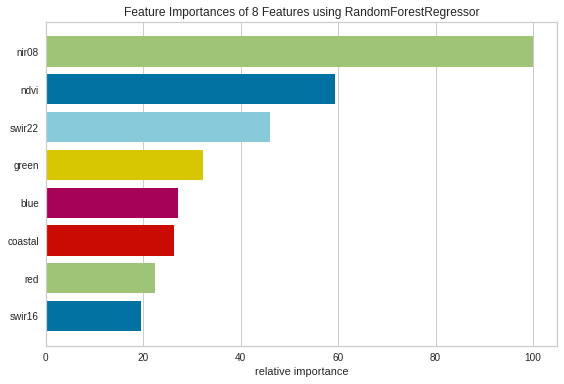

In [ ]:
# O 
#variable importance
visualizer = FeatureImportances(model)
visualizer.fit(X_train, y_train)
visualizer.show()

## Actividad: repita ejercicion de visualización de resultados con los datos de validación (test) ¿cuánta diferencia de ajuste hay?

## Respuestas

### Cargar datos rasterizados y predecir valores en raster

In [ ]:
bands_names = glob.glob('percepcion_remota/Data/Lab08/L8/*.tif')
images = []

for band in bands_names:
  bandsi = rasterio_open(band)
  bandsi.name = os.path.basename(band).split("_")[-1].split('.')[0]  # asignar el nombre de la banda al DataArray
  # Estas dos lineas que siguen, permiten agregar la fecha como una coordenada
  bandsi.coords['time'] = ('band', [pd.to_datetime(os.path.basename(band).split('_')[3])])
  bandsi = bandsi.swap_dims({'band': 'time'}).drop('band')
  images.append(bandsi)

L8 = xr.merge(images)

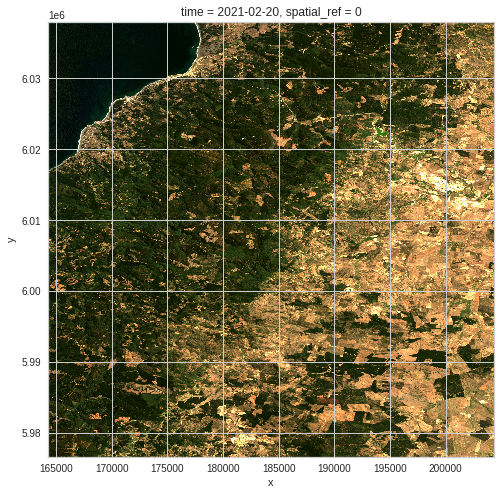

In [ ]:
L8[["red", "green", "blue"]].isel(time=0).to_array().plot.imshow(
    robust=True, figsize=(8, 8)
)

### Es fundamental es transformar el 3D array a 2D => debe tener las mismas columnas y en el mismo orden que el DataFrame que usaron para entrenar el algoritmo. 

Para esto se multiplican las filas y las columnas para transformar toda esa info a filas, y las bandas pasan a ser la columnas (mismo formato que en la tabla de datos que usamos para entrenar el algoritmo!)

In [ ]:
L8['ndvi'] = (L8.nir08 - L8.red) / (L8.nir08 + L8.red)
L8 = L8[X_train.columns]  # reordenamos al mismo orden de los datos de entrenamiento
L8

<xarray.Dataset>
Dimensions:      (time: 7, y: 2043, x: 1337)
Coordinates:
  * time         (time) datetime64[ns] 2021-02-20 2021-03-08 ... 2021-12-05
  * x            (x) float64 1.643e+05 1.643e+05 ... 2.043e+05 2.043e+05
  * y            (y) float64 6.038e+06 6.038e+06 ... 5.977e+06 5.977e+06
    spatial_ref  int64 0
Data variables:
    coastal      (time, y, x) float64 7.27e+03 7.315e+03 ... 8.11e+03 8.058e+03
    blue         (time, y, x) float64 7.377e+03 7.399e+03 ... 8.408e+03
    green        (time, y, x) float64 7.54e+03 7.594e+03 ... 9.647e+03 9.371e+03
    red          (time, y, x) float64 7.302e+03 7.349e+03 ... 1.023e+04
    nir08        (time, y, x) float64 7.307e+03 7.356e+03 ... 1.586e+04
    swir16       (time, y, x) float64 7.491e+03 7.545e+03 ... 1.616e+04
    swir22       (time, y, x) float64 7.479e+03 7.511e+03 ... 1.211e+04
    ndvi         (time, y, x) float64 0.0003423 0.000476 0.0 ... 0.2524 0.2159
Attributes:
    _FillValue:    0.0
    scale_factor:  1.0
    add_offset:    0.0

In [ ]:
img_flat = L8.isel(time=0).to_array().stack(z=('y','x'))
img_flat

<xarray.DataArray (variable: 8, z: 2731491)>
array([[7.27000000e+03, 7.31500000e+03, 7.37100000e+03, ...,
        8.63600000e+03, 8.38100000e+03, 8.18000000e+03],
       [7.37700000e+03, 7.39900000e+03, 7.44000000e+03, ...,
        9.13800000e+03, 8.76100000e+03, 8.61500000e+03],
       [7.54000000e+03, 7.59400000e+03, 7.65600000e+03, ...,
        1.02710000e+04, 9.86600000e+03, 9.52500000e+03],
       ...,
       [7.49100000e+03, 7.54500000e+03, 7.62400000e+03, ...,
        1.89590000e+04, 1.78000000e+04, 1.62150000e+04],
       [7.47900000e+03, 7.51100000e+03, 7.58200000e+03, ...,
        1.58270000e+04, 1.46210000e+04, 1.29390000e+04],
       [3.42254774e-04, 4.76028562e-04, 0.00000000e+00, ...,
        1.24621242e-01, 1.74401111e-01, 1.44438021e-01]])
Coordinates:
    time         datetime64[ns] 2021-02-20
    spatial_ref  int64 0
  * variable     (variable) <U7 'coastal' 'blue' 'green' ... 'swir22' 'ndvi'
  * z            (z) MultiIndex
  - y            (z) float64 6.038e+06 6.038e+06 ... 5.977e+06 5.977e+06
  - x            (z) float64 1.643e+05 1.643e+05 ... 2.043e+05 2.043e+05
Attributes:
    _FillValue:    0.0
    scale_factor:  1.0
    add_offset:    0.0

In [ ]:
# ahora usamos transpose para dejar las bandas como columnas y no como filas
# ahora si esta en el mismo formato de se uso para entrenar el algoritmo
img_flat = img_flat.transpose('z', 'variable')
img_flat

<xarray.DataArray (z: 2731491, variable: 8)>
array([[7.27000000e+03, 7.37700000e+03, 7.54000000e+03, ...,
        7.49100000e+03, 7.47900000e+03, 3.42254774e-04],
       [7.31500000e+03, 7.39900000e+03, 7.59400000e+03, ...,
        7.54500000e+03, 7.51100000e+03, 4.76028562e-04],
       [7.37100000e+03, 7.44000000e+03, 7.65600000e+03, ...,
        7.62400000e+03, 7.58200000e+03, 0.00000000e+00],
       ...,
       [8.63600000e+03, 9.13800000e+03, 1.02710000e+04, ...,
        1.89590000e+04, 1.58270000e+04, 1.24621242e-01],
       [8.38100000e+03, 8.76100000e+03, 9.86600000e+03, ...,
        1.78000000e+04, 1.46210000e+04, 1.74401111e-01],
       [8.18000000e+03, 8.61500000e+03, 9.52500000e+03, ...,
        1.62150000e+04, 1.29390000e+04, 1.44438021e-01]])
Coordinates:
    time         datetime64[ns] 2021-02-20
    spatial_ref  int64 0
  * variable     (variable) <U7 'coastal' 'blue' 'green' ... 'swir22' 'ndvi'
  * z            (z) MultiIndex
  - y            (z) float64 6.038e+06 6.038e+06 ... 5.977e+06 5.977e+06
  - x            (z) float64 1.643e+05 1.643e+05 ... 2.043e+05 2.043e+05
Attributes:
    _FillValue:    0.0
    scale_factor:  1.0
    add_offset:    0.0

In [ ]:
# convertir NaNs a ceros
img_flat.values = np.nan_to_num(img_flat.values) 

# predecir en datos de mapa
map_pred = model.predict(img_flat.values)
map_pred

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"


array([6.3       , 6.3       , 6.3       , ..., 5.6       , 6.9       ,
       5.26666667])

In [ ]:
# hacemoms un template con la forma del Xarray para una banda
template = img_flat[:, 0]
# asignamos los datos predichos
output_array = template.copy(data=map_pred)
output_array
# ahora hay solO una dimensión, ya que el mapa de clases tiene una sola banda

<xarray.DataArray (z: 2731491)>
array([6.3       , 6.3       , 6.3       , ..., 5.6       , 6.9       ,
       5.26666667])
Coordinates:
    time         datetime64[ns] 2021-02-20
    spatial_ref  int64 0
    variable     <U7 'coastal'
  * z            (z) MultiIndex
  - y            (z) float64 6.038e+06 6.038e+06 ... 5.977e+06 5.977e+06
  - x            (z) float64 1.643e+05 1.643e+05 ... 2.043e+05 2.043e+05
Attributes:
    _FillValue:    0.0
    scale_factor:  1.0
    add_offset:    0.0

In [ ]:
# usamos unstack para volver a la forma inicial
unstacked = output_array.unstack()
unstacked

<xarray.DataArray (y: 2043, x: 1337)>
array([[ 6.3       ,  6.3       ,  6.3       , ...,  6.5       ,
         5.93333333,  5.88333333],
       [ 6.3       ,  6.3       ,  6.3       , ...,  5.7       ,
         7.12666667,  6.26666667],
       [ 6.2       ,  6.3       ,  6.3       , ...,  5.46666667,
         7.        ,  6.6       ],
       ...,
       [ 8.4       ,  9.3       ,  9.3       , ...,  5.6       ,
         4.5       ,  5.2       ],
       [ 8.5       ,  9.3       ,  9.3       , ...,  5.5       ,
         5.6       ,  4.5       ],
       [10.1       ,  9.9       , 10.        , ...,  5.6       ,
         6.9       ,  5.26666667]])
Coordinates:
    time         datetime64[ns] 2021-02-20
    spatial_ref  int64 0
    variable     <U7 'coastal'
  * y            (y) float64 6.038e+06 6.038e+06 ... 5.977e+06 5.977e+06
  * x            (x) float64 1.643e+05 1.643e+05 ... 2.043e+05 2.043e+05
Attributes:
    _FillValue:    0.0
    scale_factor:  1.0
    add_offset:    0.0

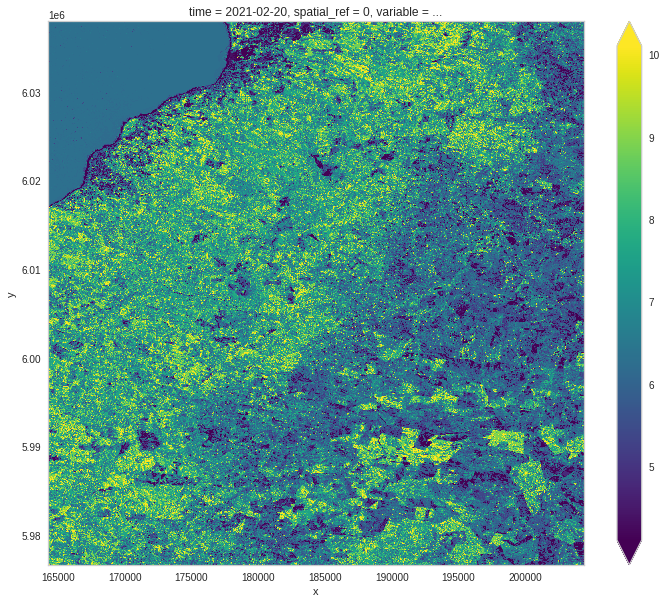

In [ ]:
unstacked.plot(figsize=(12, 10), robust=True)

## Cortar predicción a extención de los datos de entrenamiento: en muchas ocaciones es buena idea para no predecir valores fuera de rango o en zonas donde no se usaron datos de entrenamiento. 

Randon Forest, en carticular, nunca predice fuera de rango: los valores min y max son siempre los que se usaron durante el entrenamiento. Sin embargo, igual lpuede predecir mal en zonas donde donde no hay datos de entrenamiento/validación.